## Case Study 2 - Credit Card Case Study

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta

### Import the dataset

In [2]:
Customer_acq = pd.read_csv('E:\Customer Acqusition.csv')
Spend = pd.read_csv('E:\spend.csv')
Repayment = pd.read_csv('E:\Repayment.csv')

### Data Preparation

In [3]:
Repayment.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [4]:
# Drop the unnamed column, SL NO: from Repayment
Repayment.drop(['Unnamed: 4','SL No:'],axis=1,inplace=True)

In [5]:
# Change the data type of 'Month' column from object to datetime
Repayment['Month'] = Repayment['Month'].apply(lambda x:pd.to_datetime(x))

In [6]:
# Drop the null rows
Repayment.dropna().tail(2)

,Customer,Month,Amount
1498,A70,2005-08-12,454016.51
1499,A71,2004-09-13,56286.33


In [7]:
Repayment.head(2)

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02


In [8]:
Repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   object        
 1   Month     1500 non-null   datetime64[ns]
 2   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 35.8+ KB


In [9]:
Spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [10]:
# Drop the column SI No
Spend.drop('Sl No:',axis=1,inplace=True)

In [11]:
# Change the data type of 'Month' Column from object to datetime
Spend['Month'] = Spend['Month'].apply(lambda x:pd.to_datetime(x))

In [12]:
Spend.head(2)

,Customer,Month,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13


In [13]:
Spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   object        
 1   Month     1500 non-null   datetime64[ns]
 2   Type      1500 non-null   object        
 3   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 47.0+ KB


In [14]:
Customer_acq.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [15]:
# Drop the No Column
Customer_acq.drop('No',axis=1,inplace=True)

In [16]:
Customer_acq.head(2)

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [17]:
Customer_acq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  100 non-null    object 
 1   Age       100 non-null    int64  
 2   City      100 non-null    object 
 3   Product   100 non-null    object 
 4   Limit     100 non-null    float64
 5   Company   100 non-null    object 
 6   Segment   100 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.6+ KB


### Q1. In the above dataset,

### a) In case age is less than 18, replace it with mean of age values.

In [18]:
round(Customer_acq.Age.mean())

46

In [19]:
Customer_acq.loc[(Customer_acq.Age<18),'Age'] = round(Customer_acq.Age.mean())

In [20]:
Customer_acq.loc[Customer_acq.Age==46,:]

,Customer,Age,City,Product,Limit,Company,Segment
13,A14,46,BANGALORE,Gold,500000.0,C14,Salaried_Pvt
40,A41,46,COCHIN,Platimum,500000.0,C23,Govt
53,A54,46,COCHIN,Platimum,500000.0,C16,Normal Salary
62,A63,46,BANGALORE,Gold,500000.0,C25,Self Employed
67,A68,46,TRIVANDRUM,Silver,100000.0,C30,Self Employed
69,A70,46,BOMBAY,Platimum,10001.0,C32,Self Employed
89,A90,46,COCHIN,Gold,500000.0,C13,Govt


### b) In case spend amount is more than the limit, replace it with 50% of that customer's limit. (Customer's limit provided in the acquisition table is the per transaction limit on his card)

In [21]:
Customer_Spend_Transaction = pd.merge(left = Customer_acq, right = Spend, on='Customer')
Customer_Spend_Transaction.tail()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
1495,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66
1496,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,139018.26
1497,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,284521.06
1498,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,90184.22
1499,A100,36,COCHIN,Silver,100000.0,C5,Salaried_MNC,2004-01-25,BUS TICKET,224786.88


In [22]:
Customer_Spend_Transaction['Amount'] = np.where(Customer_Spend_Transaction.Amount > Customer_Spend_Transaction.Limit,
                                              Customer_Spend_Transaction.Limit/2, Customer_Spend_Transaction.Amount)
Customer_Spend_Transaction.tail()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
1495,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66
1496,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00
1497,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50
1498,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00
1499,A100,36,COCHIN,Silver,100000.0,C5,Salaried_MNC,2004-01-25,BUS TICKET,50000.00


### c) In case the repayment amount is more than the limit, replace the repament with the limit.

In [23]:
Customer_Repayment_Transaction = pd.merge(left = Customer_acq, right = Repayment, on = 'Customer')
Customer_Repayment_Transaction.tail()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
1495,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,310992.30
1496,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,121874.90
1497,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,337815.57
1498,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,25682.73
1499,A100,36,COCHIN,Silver,100000.0,C5,Salaried_MNC,2004-01-25,69551.19


In [24]:
Customer_Repayment_Transaction['Amount'] = np.where(Customer_Repayment_Transaction.Amount > Customer_Repayment_Transaction.Limit
                                           ,Customer_Repayment_Transaction.Limit, Customer_Repayment_Transaction.Amount)
Customer_Repayment_Transaction.tail()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
1495,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,100000.00
1496,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,10000.00
1497,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,10001.00
1498,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,10002.00
1499,A100,36,COCHIN,Silver,100000.0,C5,Salaried_MNC,2004-01-25,69551.19


### Q2. From the above dataset, create the following summaries:

### a) How many distinct Customers exist?

In [25]:
Customer_Spend_Transaction['Customer'].drop_duplicates().count()

100

In [26]:
Customer_Repayment_Transaction['Customer'].drop_duplicates().count()

100

##### The count of distinct customers is 100.

### b) How many distinct categories exist?

In [27]:
Customer_Spend_Transaction['Product'].drop_duplicates()

0         Gold
18      Silver
29    Platimum
Name: Product, dtype: object

In [28]:
Customer_Spend_Transaction['Product'].drop_duplicates().count()

3

##### There are 3 distinct categories and they are Gold, Silver and Platinum

### c) What is the average monthly spend by customers? 

In [29]:
Customer_Spend_Amount = Customer_Spend_Transaction.groupby(['Customer','Month'])[['Amount']].mean().reset_index()

In [30]:
Customer_Spend_Amount['Spend_Month'] = Customer_Spend_Amount['Month'].apply(lambda x:x.month)

In [31]:
Avg_Monthly_Spent = Customer_Spend_Amount.groupby(['Customer','Spend_Month'])[['Amount']].mean().add_prefix('Avg_').reset_index()

In [32]:
Avg_Monthly_Spent.head(10)

,Customer,Spend_Month,Avg_Amount
0,A1,1,341332.877000
1,A1,2,138421.151250
2,A1,4,261649.250000
3,A1,5,361141.310000
4,A1,8,344372.100000
5,A1,10,244534.680000
6,A1,11,183839.610000
7,A10,1,173828.282500
8,A10,2,170265.770000
9,A10,3,134631.266667


### d) What is the average monthly repayment by the customers?

In [33]:
Customer_Repayment_Amount = Customer_Repayment_Transaction.groupby(['Customer','Month'])[['Amount']].mean().reset_index()

In [34]:
Customer_Repayment_Amount['Repayment_Month'] = Customer_Repayment_Amount['Month'].apply(lambda x:x.month)

In [35]:
Avg_Monthly_Repayment = Customer_Repayment_Amount.groupby(['Customer','Repayment_Month'])[['Amount']].mean().add_prefix('Avg_').reset_index()

In [36]:
Avg_Monthly_Repayment.head(10)

,Customer,Repayment_Month,Avg_Amount
0,A1,1,325723.331000
1,A1,2,137713.785000
2,A1,4,254474.580000
3,A1,7,297176.740000
4,A1,9,186427.500000
5,A1,11,285729.090000
6,A10,1,283324.721667
7,A10,2,217344.503333
8,A10,3,240130.543333
9,A10,4,120467.322500


### e) If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
### (Profit is defined as interst earned on Monthly Profit. Monthly Profit = Monthly Repayment - Monthly Spent. Interest is earned only on positive profits and not on negative amoiunts)

In [38]:
Avg_Monthly_Customers = pd.merge(left = Avg_Monthly_Spent, right = Avg_Monthly_Repayment, 
                                 left_on = ['Customer','Spend_Month'],right_on=['Customer','Repayment_Month'])

In [43]:
Avg_Monthly_Customers['Monthly_Profit'] = round(Avg_Monthly_Customers.Avg_Amount_y - Avg_Monthly_Customers.Avg_Amount_x,2)

In [44]:
Avg_Monthly_Customers.head()

,Customer,Spend_Month,Avg_Amount_x,Repayment_Month,Avg_Amount_y,Monthly_Profit
0,A1,1,341332.87700,1,325723.331000,-15609.55
1,A1,2,138421.15125,2,137713.785000,-707.37
2,A1,4,261649.25000,4,254474.580000,-7174.67
3,A1,11,183839.61000,11,285729.090000,101889.48
4,A10,1,173828.28250,1,283324.721667,109496.44


In [45]:
Avg_Monthly_Customers['Profit'] = np.where(Avg_Monthly_Customers['Monthly_Profit'] > 0, 
                                           Avg_Monthly_Customers['Monthly_Profit']*2.9/100,np.nan)

In [46]:
Avg_Monthly_Customers.head(10)

,Customer,Spend_Month,Avg_Amount_x,Repayment_Month,Avg_Amount_y,Monthly_Profit,Profit
0,A1,1,341332.877000,1,325723.331000,-15609.55,NaN
1,A1,2,138421.151250,2,137713.785000,-707.37,NaN
2,A1,4,261649.250000,4,254474.580000,-7174.67,NaN
3,A1,11,183839.610000,11,285729.090000,101889.48,2954.79492
4,A10,1,173828.282500,1,283324.721667,109496.44,3175.39676
5,A10,2,170265.770000,2,217344.503333,47078.73,1365.28317
6,A10,3,134631.266667,3,240130.543333,105499.28,3059.47912
7,A10,4,270721.680000,4,120467.322500,-150254.36,NaN
8,A10,5,189207.392500,5,98672.695000,-90534.70,NaN
9,A10,7,239798.030000,7,358194.650000,118396.62,3433.50198


### f) What are the top 5 product types?

In [49]:
Customer_Spend_Transaction.groupby('Type').Amount.sum().reset_index().sort_values('Amount',ascending=False).head(5)

,Type,Amount
10,PETRO,28597384.98
4,CAMERA,27690738.44
7,FOOD,20519243.60
0,AIR TICKET,20155847.12
14,TRAIN TICKET,19995825.72


### g) Which city is having maximum spend?

In [50]:
Customer_Spend_Transaction.groupby('City').Amount.sum().reset_index().sort_values('Amount',ascending=False).head(1)

,City,Amount
4,COCHIN,45963513.5


### h) Which age group is spending more money?

In [51]:
Customer_Spend_Transaction['Age_Group'] = np.where(((Customer_Spend_Transaction.Age >= 18) & 
            (Customer_Spend_Transaction.Age < 25)), 'Youth',
            np.where(((Customer_Spend_Transaction.Age >= 25) & (Customer_Spend_Transaction.Age < 65)), 'Adult', 'Senior'))

In [52]:
Customer_Spend_Transaction.groupby('Age_Group').Amount.sum()

Age_Group
Adult     1.674181e+08
Senior    3.768249e+07
Youth     1.468050e+07
Name: Amount, dtype: float64

##### The adults aged between 25 to 65 are spending more amount of money.

### i) Who are the top 10 customers in terms of repayment?

In [53]:
Customer_Repayment_Transaction.groupby('Customer').Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)

,Customer,Amount
58,A61,10539142.91
57,A60,9876290.74
5,A13,9572000.66
38,A43,8489871.46
40,A45,8448334.87
4,A12,8334760.16
6,A14,7943268.63
39,A44,7744730.12
33,A39,7622483.30
37,A42,7615460.86


### Q3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [54]:
Customer_Spend_Transaction['Yearly_Spend'] = Customer_Spend_Transaction['Month'].apply(lambda x:x.year)

In [56]:
City_Wise_Spend = pd.pivot_table(data = Customer_Spend_Transaction, index = 'City', columns=['Product','Yearly_Spend'], 
               values='Amount', aggfunc='sum')
City_Wise_Spend

Product             Gold                              Platimum              \
Yearly_Spend        2004         2005         2006        2004        2005   
City                                                                         
BANGALORE     9289878.54  12892362.99  12030611.09  1112732.30   912284.97   
BOMBAY        6987853.53   8983018.28   7917144.31   897264.94   711804.94   
CALCUTTA      7477140.98  10303355.80  11167532.77  2037690.30  4434696.31   
CHENNAI       1059618.50   3740945.58   2704288.62  3535652.38  5053956.32   
COCHIN        7315850.15  12110613.03  10499142.38  3419904.07  4960921.71   
DELHI         2806495.00   1964845.27   2957103.32   283512.89   494157.86   
PATNA         2072567.90   3252615.77   2276181.69  1113069.60  2883231.07   
TRIVANDRUM    2415102.84   1240375.85   2735710.87  2161676.67  3601443.30   

Product                       Silver                         
Yearly_Spend        2006        2004       2005        2006  
City                                                         
BANGALORE      685831.27  1291852.58  830612.34  1415480.94  
BOMBAY         972130.01   532089.03  508988.54  1092833.80  
CALCUTTA      3589606.66   500006.00  440147.06  1157956.42  
CHENNAI       5024923.40   282056.86  377184.49   350009.50  
COCHIN        4920592.29   814229.62  652269.38  1269990.87  
DELHI          176788.72   768172.30  612311.21   854899.97  
PATNA         1256137.65   756684.10  950094.19   700005.00  
TRIVANDRUM    2147403.75   209667.48  269912.99   555862.12

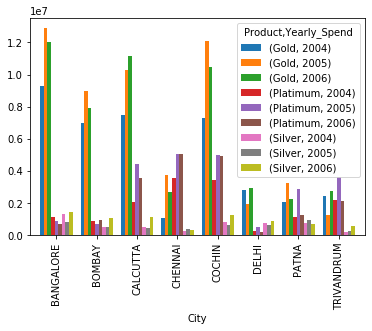

In [68]:
City_Wise_Spend.plot(kind='bar',stacked=False, width=0.8)
plt.show()

### Q4. Create graphs for

### a) Monthly comparison of total spends, city wise 

In [70]:
Customer_Spend_Transaction['Monthly_Spend'] = Customer_Spend_Transaction.Month.apply(lambda x:x.month)

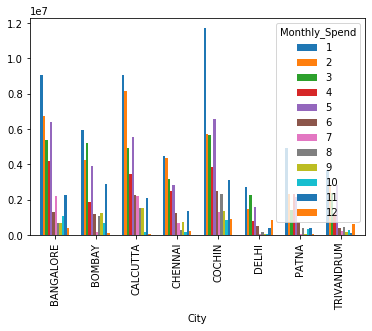

In [73]:
pd.pivot_table(data = Customer_Spend_Transaction, index = 'City', columns='Monthly_Spend', 
               values='Amount', aggfunc='sum').plot(kind='bar',stacked=False, width=0.7)

### b) Comparison of yearly spend on Air Tickets

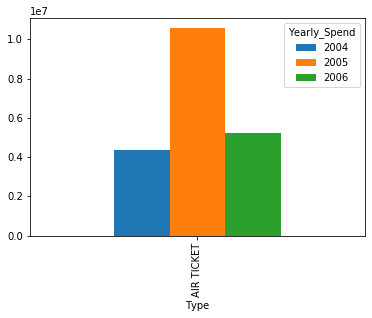

In [74]:
pd.pivot_table(data = Customer_Spend_Transaction[Customer_Spend_Transaction.Type == 'AIR TICKET'], index = 'Type', 
               columns='Yearly_Spend', values='Amount', aggfunc='sum').plot(kind='bar')
plt.show()

### c) Comparison of monthly spend for each product (look for any seasonability that exists in terms of spend)

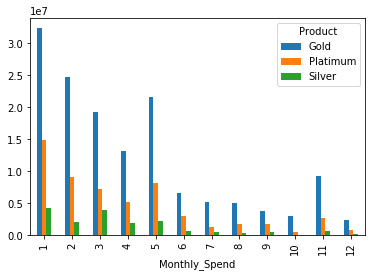

In [75]:
pd.pivot_table(data = Customer_Spend_Transaction, index = 'Monthly_Spend', columns='Product', 
               values='Amount', aggfunc='sum').plot(kind='bar')

##### It can be seen that the amount spent is failry higher in the first quarter (Jan, Feb, Mar)

### Q5. Write user defined PYTHON function to perform the following analysis:
### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [77]:
Customer_Repayment_Transaction['Yearly'] = Customer_Repayment_Transaction.Month.apply(lambda x:x.year)
Customer_Repayment_Transaction['Monthly'] = Customer_Repayment_Transaction.Month.apply(lambda x:x.month)

In [87]:
Customer_Repayment_Transaction.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,Yearly,Monthly
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,2004,1
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,2004,1
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,2004,1
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,2004,1
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,2005,1


In [81]:
def Top10Customers(product, time_period):
    return Customer_Repayment_Transaction.loc[(Customer_Repayment_Transaction.Product == product)].groupby(['Customer'
,'City','Product',time_period]).Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)

In [84]:
product = str(input("Enter Product and it should be in Gold/Silver/Platinum: "))
time_period = str(input("Enter Time Period and it should be in Yearly/Monthly: "))

Enter Product and it should be in Gold/Silver/Platinum: Gold
Enter Time Period and it should be in Yearly/Monthly: Yearly


In [85]:
Top10Customers_data = Top10Customers(product, time_period)

In [86]:
Top10Customers_data

,Customer,City,Product,Yearly,Amount
64,A61,COCHIN,Gold,2005,4276860.55
55,A44,DELHI,Gold,2005,4165317.77
58,A45,COCHIN,Gold,2005,4042447.57
52,A43,BANGALORE,Gold,2005,4006956.60
13,A13,BANGALORE,Gold,2005,3757673.00
65,A61,COCHIN,Gold,2006,3744127.41
61,A60,CALCUTTA,Gold,2005,3742856.10
14,A13,BANGALORE,Gold,2006,3477314.89
38,A29,CALCUTTA,Gold,2006,3434298.00
35,A28,TRIVANDRUM,Gold,2006,3376614.65
